In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import GEMS
import os
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE
from scipy.stats import ttest_ind as ttest,pearsonr
from sklearn.decomposition import PCA
from scipy import stats 
from matplotlib import gridspec
from statsmodels.stats.multitest import multipletests
import matplotlib.cm as cm
from etcpy import etc
import matplotlib

[0, 2, 4, 6, 8]


In [3]:
model = pickle.load(open('../results/smcabc_gem_three_conditions_save_all_particles.pkl','rb'))

### Reviewer 1

##### Q1

In [63]:
def plot_Tm_exp_vs_posterior():
    dfparam = pd.read_csv('../data/model_enzyme_params.csv',index_col=0)
    tm_exp = {ind:dfparam.loc[ind,'Tm'] for ind in dfparam.index if dfparam.loc[ind,'Tm_std']==3.4}
    tm_post = {} # {uid: [100 values]}
    for p in model.population:
        for uid in tm_exp.keys(): tm_post[uid] = tm_post.get(uid,[]) + [p[uid+'_Tm']]
    
    plt.figure(figsize=(3,2.4))
    x_exp = []
    y_mean = []
    
    start = True
    for uid in tm_exp.keys():
        if start: 
            lab1 = 'Individuals'
            lab2 = 'Mean'
            start = False
        else:
            lab1 = None
            lab2 = None
        plt.scatter(np.array([tm_exp[uid]]*100)-273.15,
                    np.array(tm_post[uid])-273.15,
                    edgecolor='#d95f02',
                    facecolor='none',
                    s=20,
                    alpha=0.3,
                    zorder=0,
                    label=lab1
                   )
        plt.scatter([np.mean(tm_exp[uid])-273.15],
                    np.mean(tm_post[uid])-273.15,
                    color='k',
                    s=20,
                    zorder=1,
                    label=lab2
                   )
        
        x_exp.append(np.mean(tm_exp[uid]))      
        y_mean.append(np.mean(tm_post[uid])-273.15)
    print(pearsonr(x_exp,y_mean))
    
    lim = [20,90]
    plt.plot(lim,lim)
    plt.xlim(lim)
    plt.ylim(lim)
    
    ticks = np.arange(20,100,10)
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.xlabel('Experimental $T_m$ ($^\circ$C)')
    plt.ylabel('$Posterior$ $T_m$ ($^\circ$C)')
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.savefig('../figures/comparison_tm_exp_pos.pdf')
    plt.show()

In [64]:
def plot_Topt_exp_vs_posterior():
    topt_exp = {}
    for line in open('../data/1_temperature_optimum_data_filtered_assay_at.tsv'):
        if line.startswith('ec'): continue
        cont = line.split()
        topts = [float(item) for item in cont[2].split(',')]
        topt_exp[cont[-1]] = topt_exp.get(cont[-1],[]) + topts
    
    topt_post = {} # {uid: [100 values]}
    for p in model.population:
        for uid in topt_exp.keys(): 
            try: topt_post[uid] = topt_post.get(uid,[]) + [p[uid+'_Topt']]
            except: None
    print(len(topt_post))
    plt.figure(figsize=(3,2.4))
    
    x_exp = []
    y_mean = []
    start = True
    for uid in topt_exp.keys():
        if topt_post.get(uid) is None: continue
        if start: 
            lab1 = 'Individuals'
            lab2 = 'Mean'
            start = False
        else:
            lab1 = None
            lab2 = None
        plt.scatter(np.array([np.mean(topt_exp[uid])]*100),
                    np.array(topt_post[uid])-273.15,
                    edgecolor='#d95f02',
                    facecolor='none',
                    s=20,
                    alpha=0.3,
                    zorder=0,
                    label=lab1
                  )
        
        plt.scatter([np.mean(topt_exp[uid])],
                    np.mean(topt_post[uid])-273.15,
                    color='k',
                    s=20,
                    zorder=1,
                    label=lab2
                   )
        
        x_exp.append(np.mean(topt_exp[uid]))      
        y_mean.append(np.mean(topt_post[uid])-273.15)
    print(pearsonr(x_exp,y_mean))
    lim = [-10,60]
    plt.plot(lim,lim)
    plt.xlim(lim)
    plt.ylim(lim)
    
    ticks = np.arange(-10,70,10)
    plt.xticks(ticks)
    plt.yticks(ticks)
    plt.xlabel('Experimental $T_{opt}$ ($^\circ$C)')
    plt.ylabel('$Posterior$ $T_{opt}$ ($^\circ$C)')
    plt.legend(fontsize=8)
    plt.tight_layout()
    plt.savefig('../figures/comparison_topt_exp_pos.pdf')
    plt.show()

(0.9688459021121503, 1.9555809254903024e-161)


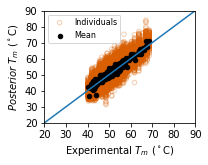

In [65]:
plot_Tm_exp_vs_posterior()

14
(0.49025129075806606, 0.07512318965195)


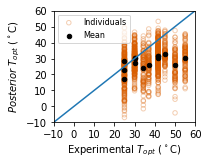

In [66]:
plot_Topt_exp_vs_posterior()

#### Down regulate ERG pathways

In [3]:
results = pickle.load(open('../results/down_regulate_erg_pathway_40.pkl','rb'))

In [4]:
[T,ps,rmax] = results

In [5]:
rmax_ori = np.array([item[0] for item in rmax])
rmax_rec = np.array([item[1] for item in rmax])

rmax_ori_percents = np.percentile(rmax_ori,[5,50,95],axis=0)
rmax_rec_percents = np.percentile(rmax_rec,[5,50,95],axis=0)

In [14]:
ps = 100*ps

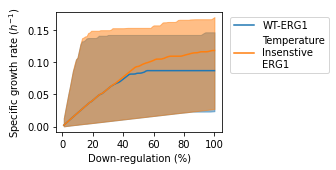

In [27]:
plt.figure(figsize=(4.8,2.4))


plt.plot(ps,rmax_ori_percents[1,:],color='#2077B4',zorder=1,label='WT-ERG1')
plt.fill_between(ps,rmax_ori_percents[0,:],rmax_ori_percents[2,:],alpha=0.5,color='#2077B4',zorder=0)
    

plt.plot(ps,rmax_rec_percents[1,:],color='#FF7F0E',zorder=1,label='Temperature\nInsenstive\nERG1')
plt.fill_between(ps,rmax_rec_percents[0,:],rmax_rec_percents[2,:],alpha=0.5,color='#FF7F0E',zorder=0)

#plt.xticks(np.arange(0,1.2,0.2))
#plt.xlim(-7,0.)
plt.xticks(np.arange(0,120,20))
plt.xlabel('Down-regulation (%)')
plt.ylabel('Specific growth rate ($h^{-1}$)')
plt.legend(bbox_to_anchor=(1.02,1.0),loc='upper left')
plt.tight_layout()

plt.savefig('../figures/down_regulated_ERG_pathways.png',dpi=300)
plt.show()

In [21]:
2**(-0.5)

0.7071067811865476

#### Topt vs RNAseq

In [9]:
def load_gene_names():
    gene_names = dict()
    gene_ids = dict()
    for line in open('../data/enzyme_uniprot_gene_name.csv'):
        cont = line.strip().split(',')
        gene_names[cont[0]] = cont[1]
        gene_ids[cont[1]] = cont[0]
    return gene_names,gene_ids

In [4]:
def load_param_mean_std(population):
    # return a datafram with Tm, Topt, dCpt as columns
    params_lst = {idd:[p[idd] for p in population] for idd in population[0].keys()}
    df = pd.DataFrame()
    
    for idd,lst in params_lst.items():
        [prot,param] = idd.split('_')
        if param in ['Tm','Topt']:
            df.loc[prot,'{0}_mean'.format(param)] = np.mean(lst) - 273.15 # C
            df.loc[prot,'{0}_std'.format(param)] = np.std(lst)
        if param in ['dCpt']:
            df.loc[prot,'{0}_mean'.format(param)] = np.mean(lst)/1000 # kJ/mol/K
            df.loc[prot,'{0}_std'.format(param)] = np.std(lst)/1000
    return df

In [5]:
dfpost = load_param_mean_std(model.population)

In [6]:
dfrna = pd.read_csv('../data/high_temp_RNAseq.csv',index_col=0)

In [7]:
uni2orf = {}
for line in open('../data/ORF_UniProt_Name.txt'):
    cont = line.split(',')
    uni2orf[cont[1]] = cont[0]
print(len(uni2orf))

764


In [13]:
ERG_genes = ['ERG10','ERG13','HMG1','HMG2','ERG12','ERG8','MVD1','IDI1','ERG20',
             'ERG9','ERG7','ERG11','ERG24','ERG25','ERG26','ERG27','ERG6','ERG2',
             'ERG3','ERG5','ERG4']
gene_names,gene_ids = load_gene_names()
ERG_IDs = [gene_ids[g] for g in ERG_genes]

In [16]:
topts,rnas = [],[]
topts_erg, rnas_erg = [],[]
for enz in dfpost.index:
    try:
        rnas.append(dfrna.loc[uni2orf[enz],'High Temp log2FC'])
        topts.append(dfpost.loc[enz,'Topt_mean'])
        
        if enz in ERG_IDs:
            rnas_erg.append(dfrna.loc[uni2orf[enz],'High Temp log2FC'])
            topts_erg.append(dfpost.loc[enz,'Topt_mean'])
        
    except: None
    
print(len(rnas),len(topts_erg))

746 21


(-0.06049169392893076, 0.09874854414113107)
(-0.31328447464997233, 0.16671205947399367)


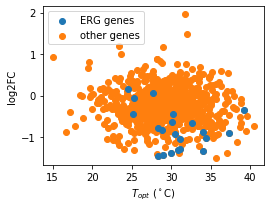

In [22]:
plt.figure(figsize=(4,3))
plt.scatter(topts_erg,rnas_erg,label='ERG genes',zorder=1)
plt.scatter(topts,rnas,label='other genes',zorder=0)

print(pearsonr(topts,rnas))
print(pearsonr(topts_erg,rnas_erg))

plt.xlabel('$T_{opt}$ ($^\circ$C)')
plt.ylabel('log2FC')
#plt.title("Pearson's $r$: {:.2f}".format(pearsonr(topts,rnas)[0]))
plt.legend()
plt.tight_layout()
plt.savefig('../figures/Topt_vs_log2fc.png',dpi=300)
plt.show()

In [8]:
!head ../data/ORF_UniProt_Name.txt

YDR204W,O13525,COQ4
YJR048W,P00044,CYC1
YEL039C,P00045,CYC7
YFR033C,P00127,QCR6
YDR529C,P00128,QCR7
YML054C,P00175,CYB2
YOL086C,P00330,ADH1
YMR303C,P00331,ADH2
YJR009C,P00358,TDH2
YGR192C,P00359,TDH3


In [18]:
dfrna

,High Temp log2FC,High Temp FDR,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
Protein-coding Genes,,,,,,,,,
YBR001C,1.245043,3.737090e-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YBR019C,1.977119,2.679220e-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YHR163W,-1.064066,4.256870e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YJL082W,0.647492,5.004630e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YER081W,-1.321034,1.395630e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YJL137C,0.893157,7.713880e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YPR058W,-0.729673,7.290440e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YDR009W,0.659845,6.747510e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEL016C,0.702057,8.026510e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Topt fluxes

In [3]:
mae = pickle.load(open('../models/aerobic.pkl','rb'))

In [4]:
[topt_exp,results] = pickle.load(open('../results/32_vs_40_topt_exp_rxns.pkl','rb'))

In [5]:
rxns = {}
sel_topt_exp = {}
for uni in topt_exp.keys(): 
    try:
        met_prot = mae.metabolites.get_by_id('prot_{0}'.format(uni))
        lst = [rxn.id for rxn in met_prot.reactions if 'prot_pool' not in rxn.reaction]
        rxns[uni]=lst
        sel_topt_exp[uni] = topt_exp[uni]
    except: continue

In [6]:
def find_vmax_for_one_particle(one_results):
    vmax_uni_32 = {rxn_id:one_results[32][rxn_id][1] for rxn_id in one_results[32].keys() if one_results[32][rxn_id][1] is not None} 
    vmax_uni_40 = {rxn_id:one_results[40][rxn_id][1] for rxn_id in one_results[40].keys() if one_results[40][rxn_id][1] is not None} 
    return vmax_uni_32, vmax_uni_40

In [7]:
def find_vmax_for_all_particles(results):
    vmax = {}
    for one_particle in results:
        vmax = find_vmax_for_one_particle(one_particle,vmax)
    return vmax

In [8]:
vmax32 = {}
vmax40 = {}
for one_particle in results:
    vmax_uni_32, vmax_uni_40 = find_vmax_for_one_particle(one_particle)
    for k,v in vmax_uni_32.items():vmax32[k] = vmax32.get(k,[]) + [v]
    for k,v in vmax_uni_40.items():vmax40[k] = vmax40.get(k,[]) + [v]

In [9]:
rxn_tmps = {}
for uni, rxn_lst in rxns.items():
    tmp = np.mean(sel_topt_exp[uni])
    for rxn_id in rxn_lst: rxn_tmps[rxn_id] = tmp

/cephyr/users/gangl/Vera/Tools/my_python3_vera/lib/python3.6/site-packages/ipykernel_launcher.py:10 MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/cephyr/users/gangl/Vera/Tools/my_python3_vera/lib/python3.6/site-packages/ipykernel_launcher.py:13 MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


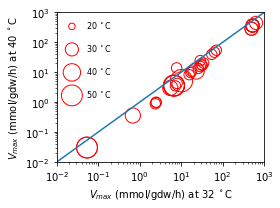

In [14]:
rxn_ids = vmax32.keys()
vmax_32_lst = np.array([np.mean(vmax32[k]) for k in rxn_ids])
vmax_40_lst = np.array([np.mean(vmax40[k]) for k in rxn_ids])
ts = [rxn_tmps[k] for k in rxn_ids]

cmap = plt.cm.Reds
norm = matplotlib.colors.Normalize(vmin=np.mean(ts)*0.5, vmax=np.max(ts))

plt.figure(figsize=(4,3))
plt.scatter(vmax_32_lst,vmax_40_lst,s=norm(ts)*500,edgecolors='r',facecolor='')

# for legend
plots = [plt.scatter([1e-4],[1e-4],s=norm(x)*500,edgecolors='r',facecolor='') for x in [20,30,40,50]]
plt.legend(plots,
       ('20 $^\circ$C', '30 $^\circ$C', '40 $^\circ$C', '50 $^\circ$C'),
       scatterpoints=1,
       ncol=1,
       fontsize=8,
       labelspacing=1.5,
          frameon=False)

plt.xscale('log')
plt.yscale('log')
lim = [0.01,1000]
plt.xlim([0.01,1000])
plt.ylim([0.01,1000])
plt.plot(lim,lim)
plt.xlabel('$V_{max}$ (mmol/gdw/h) at 32 $^\circ$C')
plt.ylabel('$V_{max}$ (mmol/gdw/h) at 40 $^\circ$C')
plt.tight_layout()
plt.savefig('../figures/32_vs_40_topt_exp_rxns_1.pdf')
plt.show()

/cephyr/users/gangl/Vera/Tools/my_python3_vera/lib/python3.6/site-packages/ipykernel_launcher.py:2 RuntimeWarning: invalid value encountered in true_divide


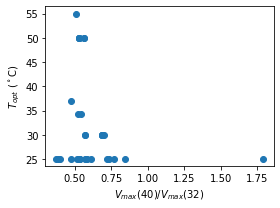

In [94]:
plt.figure(figsize=(4,3))
plt.scatter(vmax_40_lst/vmax_32_lst,ts)
plt.xlabel('$V_{max}$(40)/$V_{max}$(32)')
plt.ylabel('$T_{opt}$ ($^\circ$C)' )
plt.tight_layout()
plt.savefig('../figures/32_vs_40_topt_exp_rxns_2.pdf')
plt.show()

In [12]:
len(ts)

43

In [13]:
len(sel_topt_exp)

14

In [16]:
1/2**1.5

0.35355339059327373

#### Ensential gene

In [4]:
def load_param_mean():
    particles = pickle.load(open('../results/smcabc_gem_three_conditions_save_all_particles.pkl','rb')).population
    
    tm_post   = {} # {uid: [100 values]}
    topt_post = {}
    dCpt_post = {}
    for p in particles:
        for k,v in p.items():
            uni = k.replace('_Tm','').replace('_Topt','').replace('_dCpt','')
            if k.endswith('_Tm'): tm_post[uni] = tm_post.get(uni,[]) + [v]
            if k.endswith('_Topt'): topt_post[uni] = topt_post.get(uni,[]) + [v]
            if k.endswith('_dCpt'): dCpt_post[uni] = dCpt_post.get(uni,[]) + [v]
    
    # get mean
    for k in tm_post.keys():
        tm_post[k] = np.mean(tm_post[k])-273.15     # C
        topt_post[k] = np.mean(topt_post[k])-273.15 # C
        dCpt_post[k] = np.mean(dCpt_post[k])/1000   # kJ/mol/K
    return tm_post, topt_post, dCpt_post

In [5]:
def load_essential_genes():
    essential_genes_orf = [line.strip().upper() for line in open('../data/essential_genes.txt') 
                           if not line.startswith('#')]
    print(len(essential_genes_orf))
    
    orf2uni = {}
    for line in open('../data/ORF_UniProt_Name.txt'):
        cont = line.split(',')
        orf2uni[cont[0]] = cont[1]
    
    essential_enzyme = []
    for orf in essential_genes_orf:
        try   : essential_enzyme.append(orf2uni[orf])
        except: continue
    
    print(len(essential_enzyme))
    return essential_enzyme

In [6]:
tm_post, topt_post, dCpt_post = load_param_mean()

In [7]:
essential_enzyme = load_essential_genes()

1189
135


In [14]:
def box_plot(inviable,viable,ylabel):
    plt.figure(figsize=(3,3))
    print(ttest(inviable,viable))
    plt.boxplot([inviable,viable],showfliers=False)
    
    plt.scatter(np.random.normal(1,0.01,size=len(inviable)),inviable,s=3)
    plt.scatter(np.random.normal(2,0.01,size=len(viable)),viable,s=3)
    
    plt.title('$p_{val}$'+'=${:.3f}$'.format(ttest(inviable,viable).pvalue))
    plt.xticks([1,2],['Essential','Non-Essential'])
    
    plt.ylabel(ylabel)
    plt.show()

Ttest_indResult(statistic=-2.580501959871118, pvalue=0.010050692177867568)


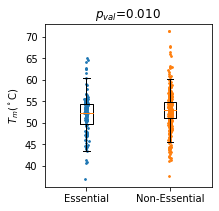

In [16]:
tm_inviable = [tm_post[uni] for uni in essential_enzyme]
tm_viable = [tm_post[uni] for uni in tm_post.keys() if uni not in essential_enzyme]

box_plot(tm_inviable,tm_viable,'$T_m (^\circ$C)')

Ttest_indResult(statistic=0.028638250207043917, pvalue=0.9771605647455393)


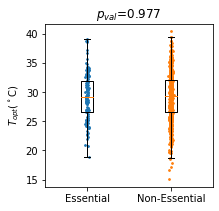

In [17]:
topt_inviable = [topt_post[uni] for uni in essential_enzyme]
topt_viable = [topt_post[uni] for uni in topt_post.keys() if uni not in essential_enzyme]
box_plot(topt_inviable,topt_viable,'$T_{opt} (^\circ$C)')

Ttest_indResult(statistic=1.728166033670984, pvalue=0.08436146501948052)


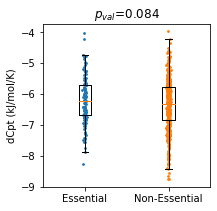

In [18]:
dcpt_inviable = [dCpt_post[uni] for uni in essential_enzyme]
dcpt_viable = [dCpt_post[uni] for uni in dCpt_post.keys() if uni not in essential_enzyme]
box_plot(dcpt_inviable,dcpt_viable,'dCpt (kJ/mol/K)')